# Pima Indians Diabetes Dataset 

In [1]:
# imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

In [2]:
# loading dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Wrangling

In [4]:
# Check for duplicates

df.duplicated().sum()

0

All of the data are numerical non-nulls. Missing values could be 0's.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0's makes sense in the Pregnencies column but they probably means missing data in others.

In [6]:
missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


for column in missing:
    print(column, (df[column] == 0).sum())

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


In [7]:
# replace all 'missing value' 0's to NaN

for column in missing:
    df[column].replace(0, np.nan, inplace=True)

df[missing].isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [8]:
# % of missing values in these columns

(df[missing].isnull().sum() / len(df) * 100).round(2)

Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
dtype: float64

## Exploratory Data Analysis

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


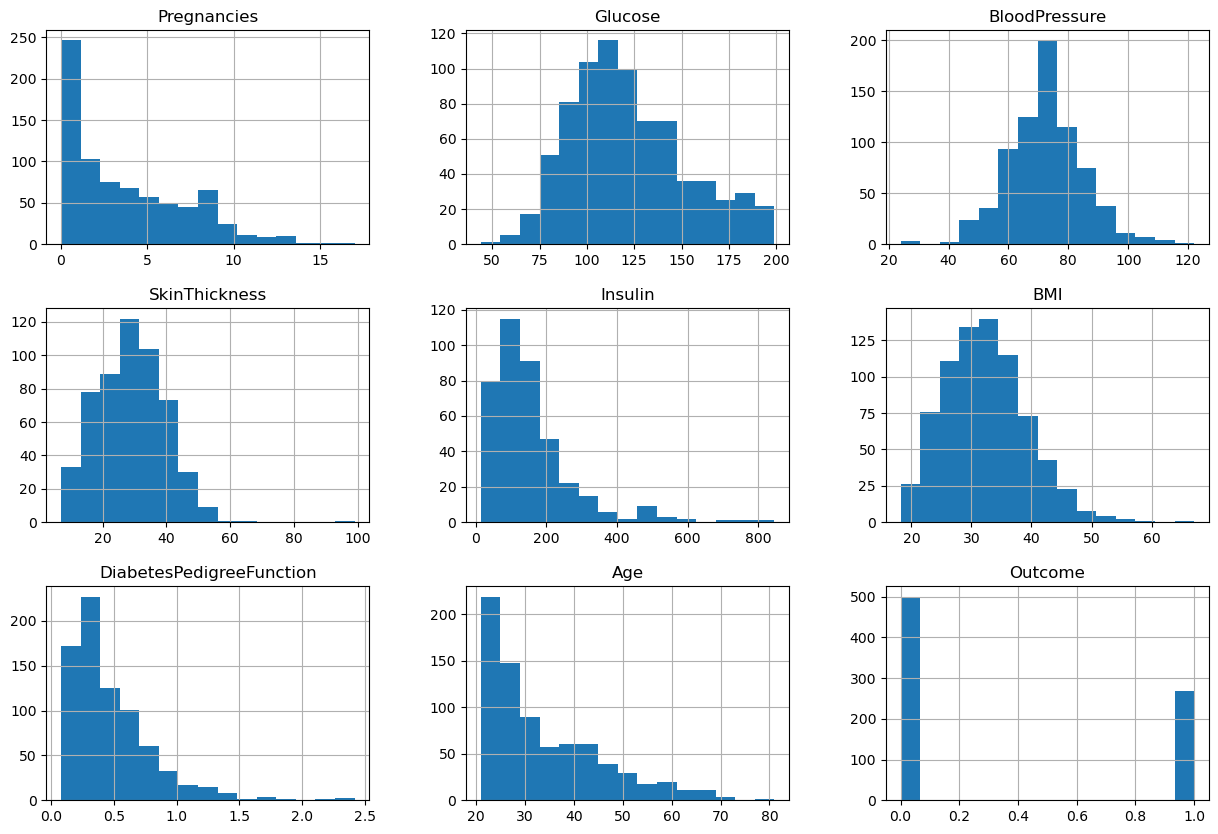

In [10]:
# distributions of values in each column after removing missing values 0s

df.hist(bins=15,figsize=(15, 10));

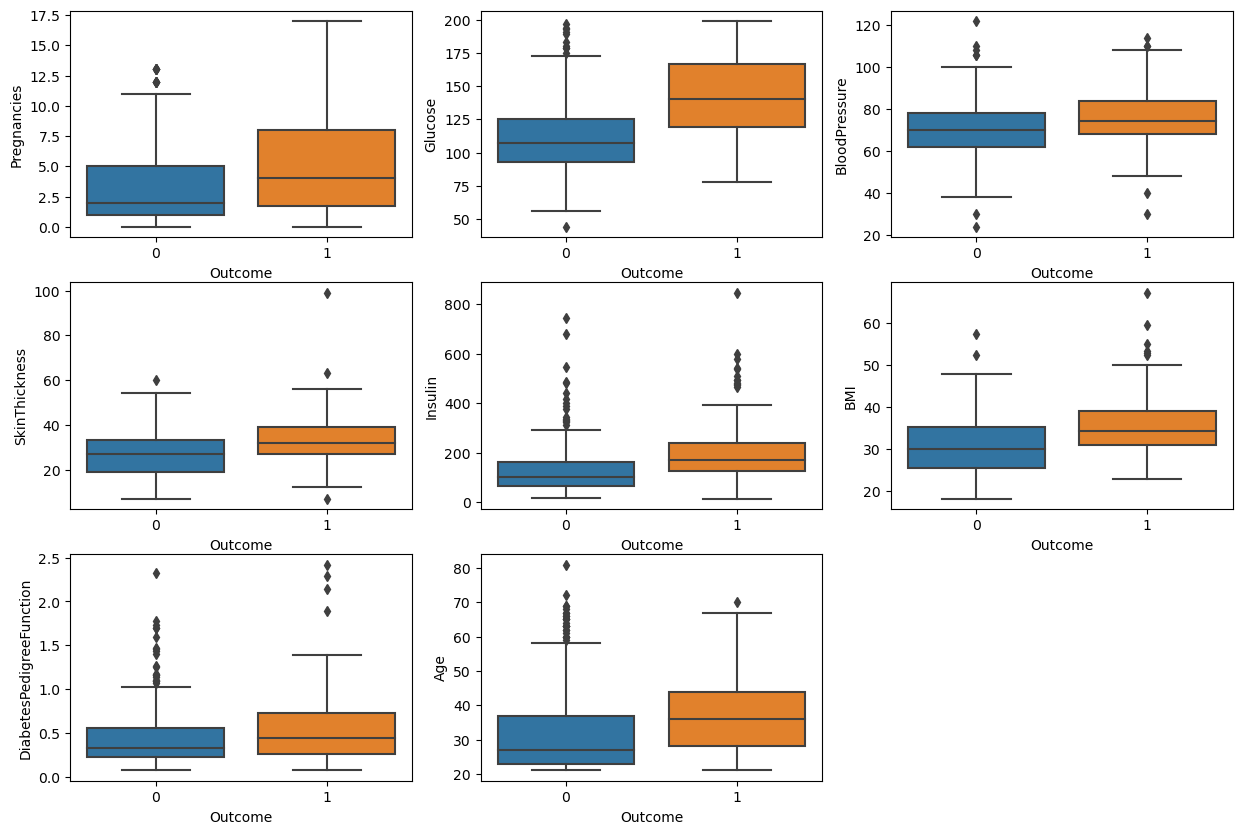

In [11]:
fig, axes = plt.subplots(3,3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    sns.boxplot(data=df, y=df.columns[i], x='Outcome', ax=ax)

fig.delaxes(axes.flat[8])

In nearly all the features outcome 1 has slightly higher average values with 'Glucose' showing clear separation in their ranges. 

In [12]:
# % of each class in 'Outcome'

(df['Outcome'].value_counts() / len(df) * 100).round(2)

0    65.1
1    34.9
Name: Outcome, dtype: float64

In [13]:
# pairwise Pearson correlations between variables

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


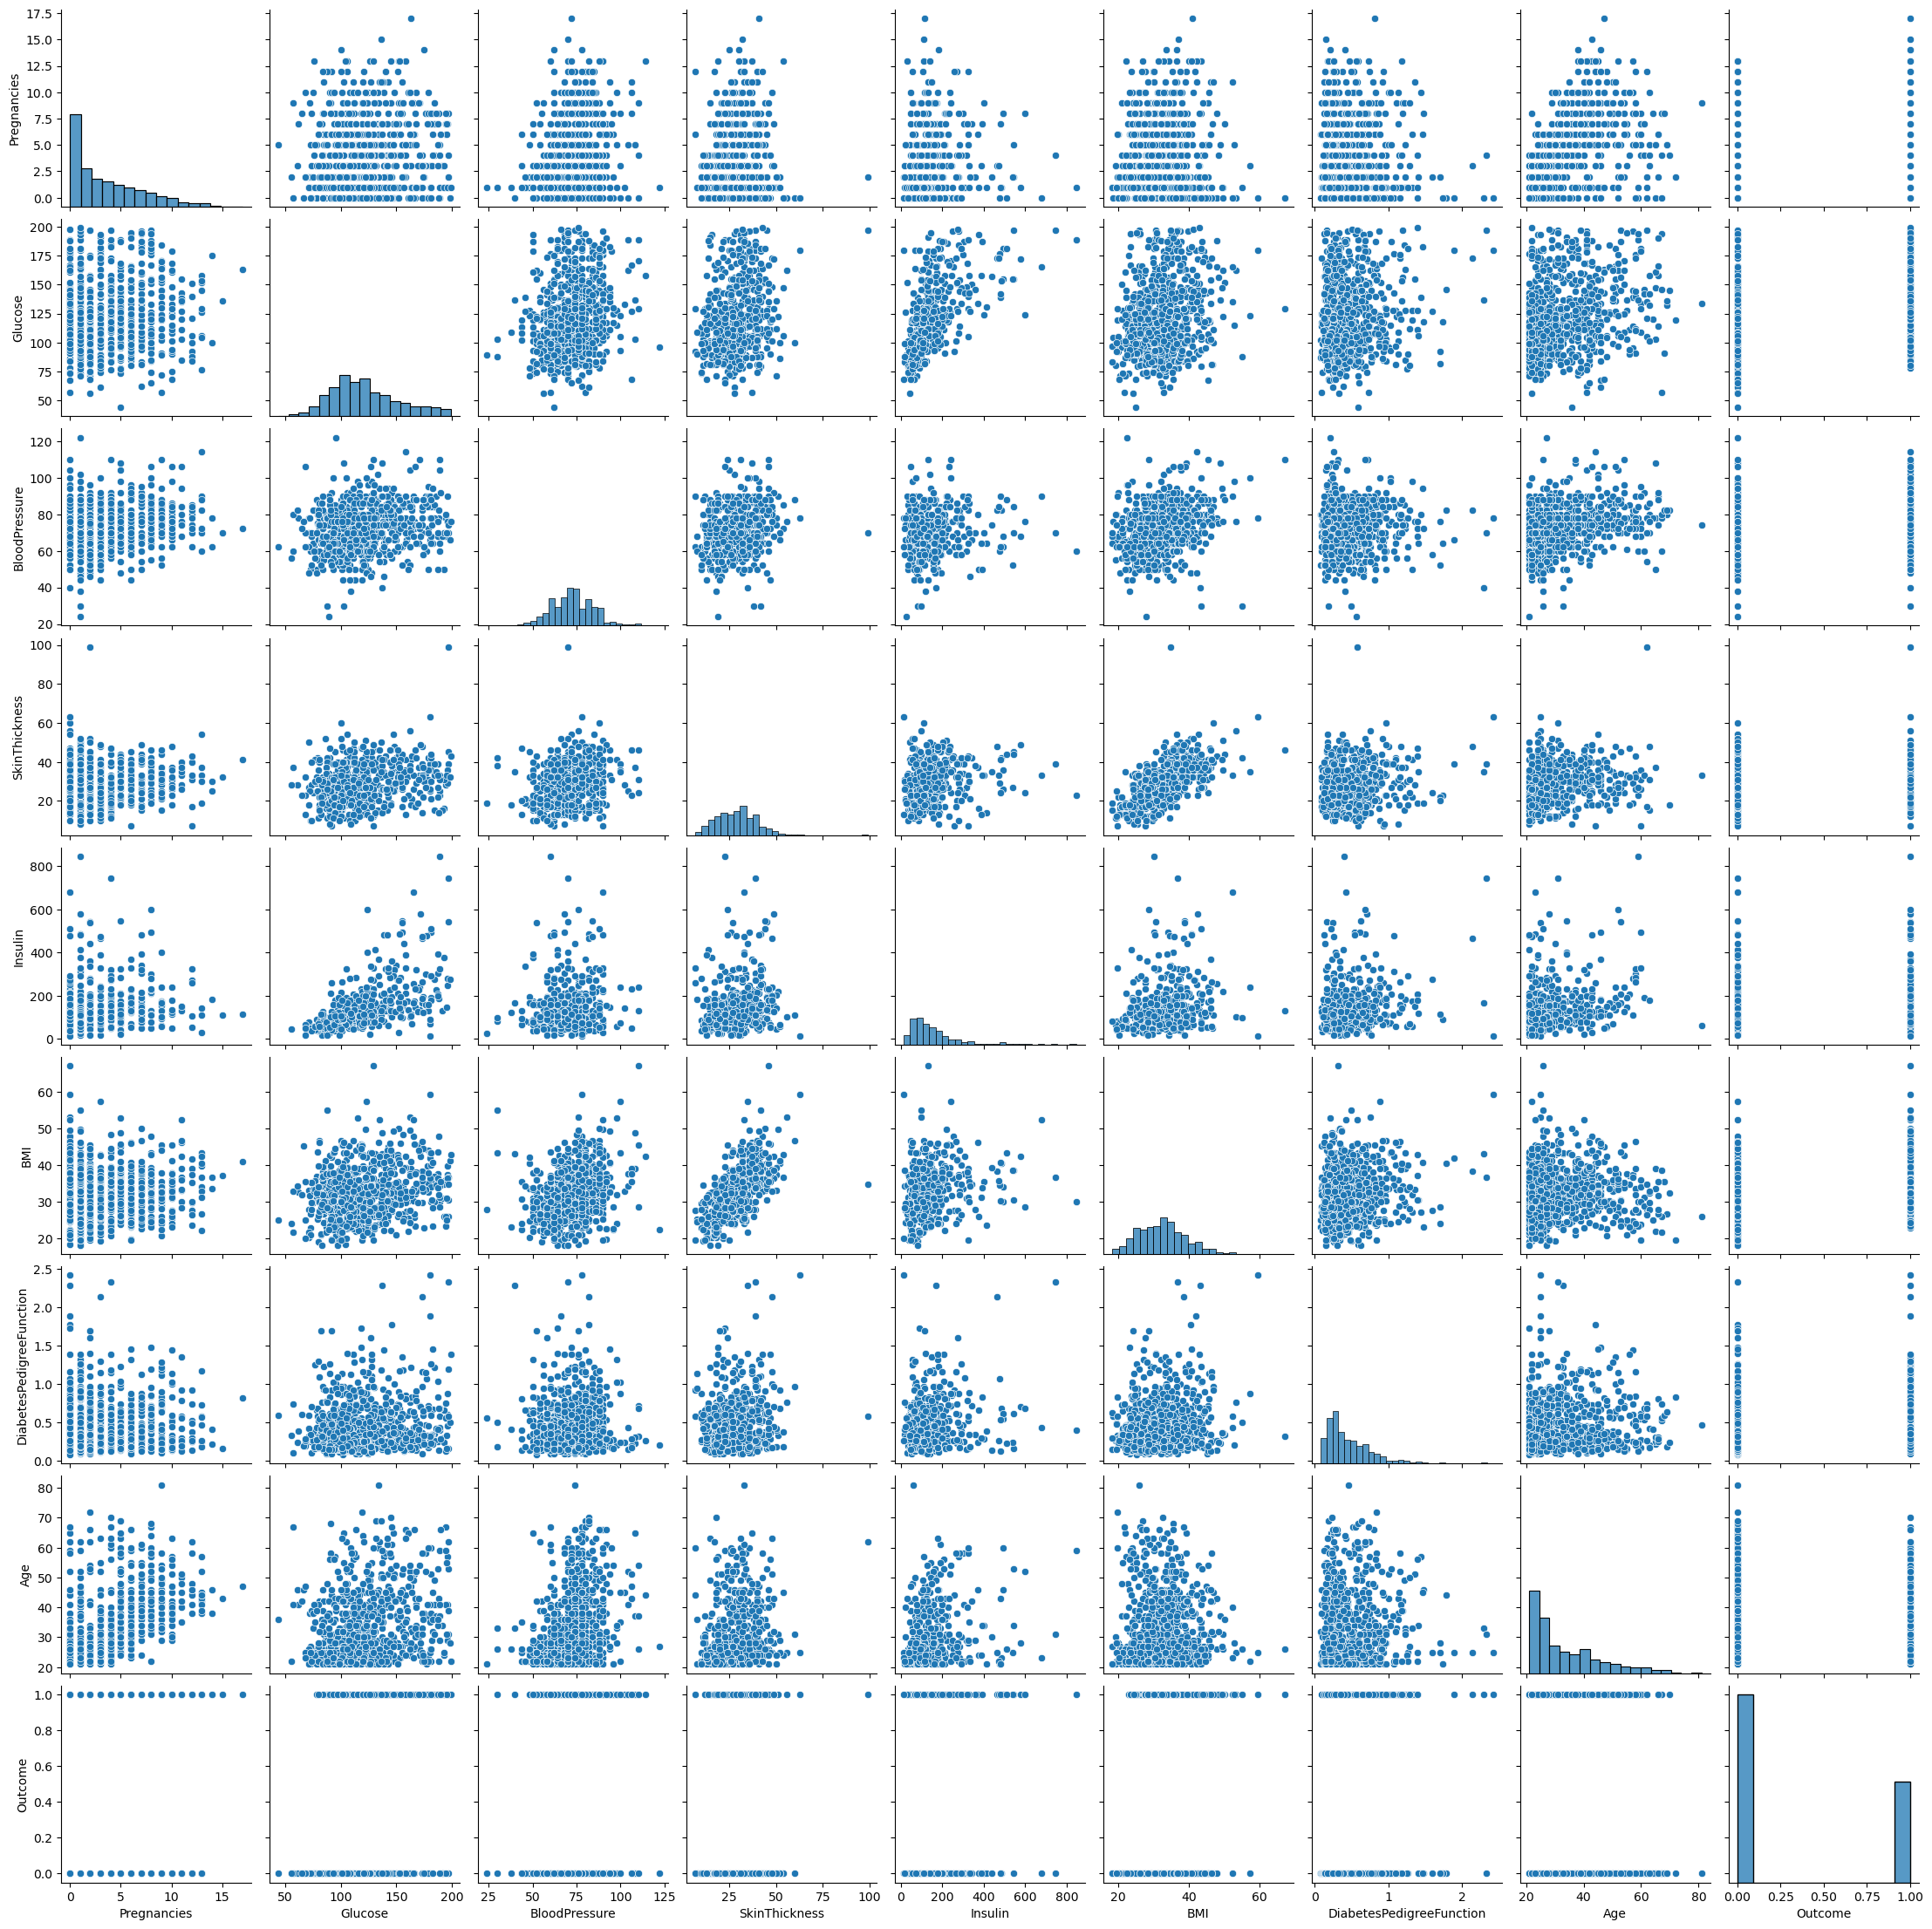

In [14]:
# pairplot of correlations between variables

sns.pairplot(df)
plt.show()

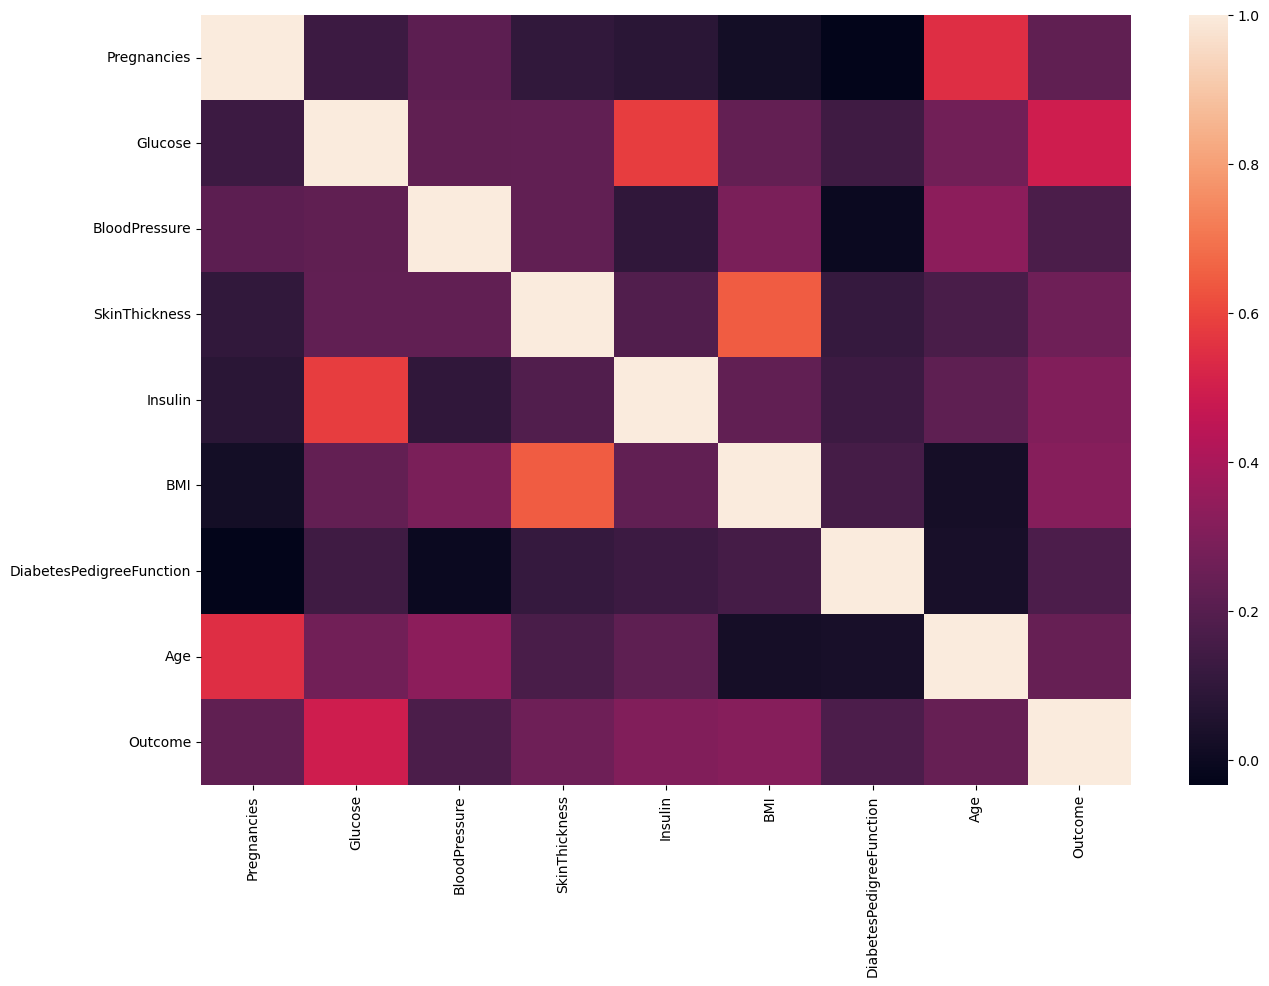

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax)
plt.show()

## Pre-processing

In [16]:
# impute missing values

df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

df[missing].isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

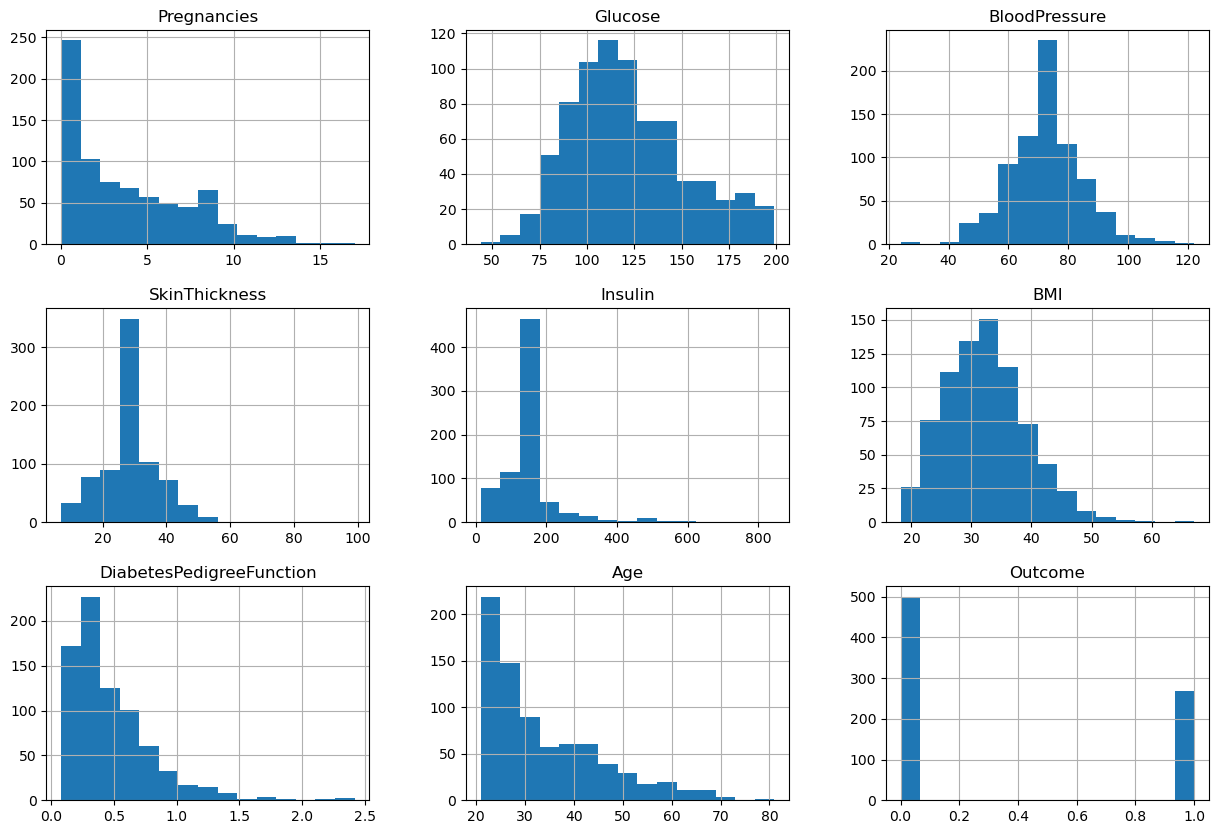

In [17]:
# checking distribution of values in columns after imputation

df.hist(bins=15,figsize=(15, 10))
plt.show()

### Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train-test-split

y = df['Outcome']
X = df.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Scaling data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# fitting a model

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# accuracy score

print('training accuracy: {:.2f}'.format(model.score(X_train_scaled, y_train)))
print('testing accuracy: {:.2f}'.format(model.score(X_test_scaled, y_test)))

training accuracy: 0.78
testing accuracy: 0.73


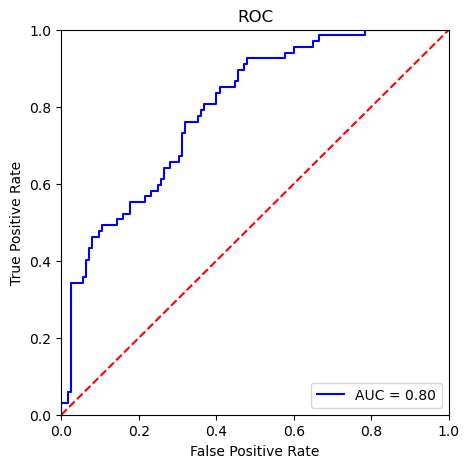

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test_scaled))

auc = roc_auc_score(y_test, model.decision_function(X_test_scaled))

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc:.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       125
           1       0.66      0.49      0.56        67

    accuracy                           0.73       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.73      0.73      0.72       192



In [21]:
# gridsearch CV with Logistic Regression model

from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1'], 'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
LogReg = LogisticRegression(solver='liblinear')

LogRegCV = GridSearchCV(LogReg, params)
LogRegCV.fit(X, y)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                         'penalty': ['l2', 'l1']})

In [22]:
print('best estimator: {}'.format(LogRegCV.best_estimator_))
print('best parameters: {}'.format(LogRegCV.best_params_))
print('best score: {:.2f}'.format(LogRegCV.best_score_))

best estimator: LogisticRegression(C=10.0, penalty='l1', solver='liblinear')
best parameters: {'C': 10.0, 'penalty': 'l1'}
best score: 0.77


In [23]:
lr_best = LogRegCV.best_estimator_
lr_best.fit(X_train, y_train)

y_pred_lr_best = lr_best.predict(X_test)

print('training accuracy: {:.2f}'.format(lr_best.score(X_train, y_train)))
print('testing accuracy: {:.2f}'.format(lr_best.score(X_test, y_test)))
print(classification_report(y_test, y_pred_lr_best))

training accuracy: 0.78
testing accuracy: 0.75
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       125
           1       0.70      0.49      0.58        67

    accuracy                           0.75       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

y_pred_tree = dt.predict(X_test)

print('training accuracy: {:.2f}'.format(dt.score(X_train, y_train)))
print('testing accuracy: {:.2f}'.format(dt.score(X_test, y_test)))
print(classification_report(y_test, y_pred_tree))

training accuracy: 0.85
testing accuracy: 0.71
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       125
           1       0.60      0.48      0.53        67

    accuracy                           0.71       192
   macro avg       0.68      0.65      0.66       192
weighted avg       0.70      0.71      0.70       192



### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion': ['gini','entropy'],
    'max_depth': [15, 17, 20],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [12, 14, 16],
    'n_estimators': [200, 300, 400]}

rf = RandomForestClassifier()
rfcv = GridSearchCV(rf, params, verbose=2)
rfcv.fit(X, y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=3

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=15, ma

[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=15, ma

[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=15, ma

[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=15, ma

[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=17, ma

[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=17, ma

[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=17, ma

[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=17, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=17, ma

[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.7s
[CV] END criterion=gini, max_depth=20, ma

[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, ma

[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, ma

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END criterion=gini, max_depth=20, ma

[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=gini, max_depth=20, ma

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=16, n_estimators=400; total time=   0.8s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=400; total time=   1.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=12, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=log2, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=17, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=400; total time=   0.6s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   0.7s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=14, n_estimators=400; total time=   0.7s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=16, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=entropy, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=16, n_estimators=400; total time=   0.6s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=12, n_estimators=400; total time=   0.6s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.5s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=300; total time=   0.4s
[CV] END criterion=e

[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=200; total time=   0.3s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.4s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=300; total time=   0.4s
[CV] END criterion=e

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 17, 20],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [12, 14, 16],
                         'n_estimators': [200, 300, 400]},
             verbose=2)

In [26]:
print('best estimator: {}'.format(rfcv.best_estimator_))
print('best parameters: {}'.format(rfcv.best_params_))
print('best score: {:.2f}'.format(rfcv.best_score_))

best estimator: RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_leaf=5, min_samples_split=16,
                       n_estimators=400)
best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 400}
best score: 0.78


In [27]:
rf_best = rfcv.best_estimator_
rf_best.fit(X_train, y_train)

y_pred_rf_best = rf_best.predict(X_test)

print('training accuracy: {:.2f}'.format(rf_best.score(X_train, y_train)))
print('testing accuracy: {:.2f}'.format(rf_best.score(X_test, y_test)))
print(classification_report(y_test, y_pred_rf_best))

training accuracy: 0.88
testing accuracy: 0.73
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       125
           1       0.65      0.52      0.58        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.73      0.73      0.73       192



In [28]:
# features importances

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, rf_best.feature_importances_)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('{:25} : {}'.format(*pair)) for pair in feature_importances];


Glucose                   : 0.34
BMI                       : 0.2
Age                       : 0.14
DiabetesPedigreeFunction  : 0.09
Pregnancies               : 0.07
Insulin                   : 0.07
BloodPressure             : 0.05
SkinThickness             : 0.05


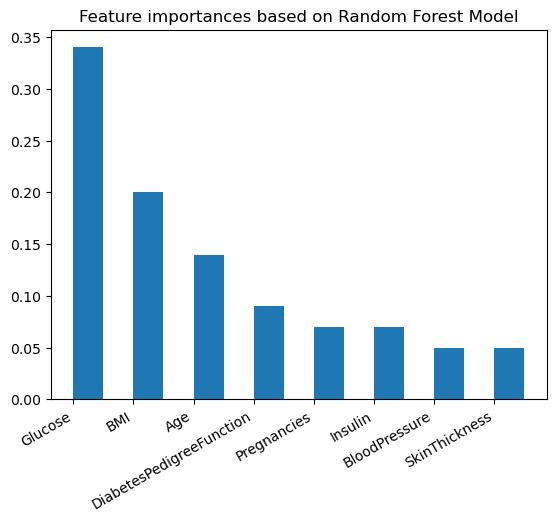

In [66]:
plt.bar([i[0] for i in feature_importances],[i[1] for i in feature_importances], align='edge', width=0.5)
plt.xticks(rotation=30, ha='right')
plt.title('Feature importances based on Random Forest Model')
plt.show()


### Support Vector Machine

In [29]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print('training accuracy: {:.2f}'.format(svm.score(X_train_scaled, y_train)))
print('testing accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))
print(classification_report(y_test, y_pred_svm))

training accuracy: 0.85
testing accuracy: 0.71
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       125
           1       0.64      0.42      0.50        67

    accuracy                           0.71       192
   macro avg       0.69      0.64      0.65       192
weighted avg       0.70      0.71      0.70       192



In [30]:
# SVM grid seach

params_svm = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm = SVC()
svm_gs = GridSearchCV(svm, params_svm, verbose=3)
X_scaled = scaler.fit_transform(X)

svm_gs.fit(X_scaled, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.753 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.747 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.779 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.784 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.765 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.695 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.675 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.682 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.784 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.732 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.779 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.784 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.765 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.682 total time=   1.8s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.669 total time=   1.3s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.675 total time=   1.0s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.778 total time=   1.3s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.725 total time=   0.6s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 5/5] END ..........C=1, 

[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.675 total time=  16.2s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.675 total time=   9.0s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.682 total time=  18.8s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.758 total time=  16.0s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.732 total time=   8.4s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.669 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.727 total time=   0.0s
[CV 3/5] END .....C=10, gamm

[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.675 total time= 1.7min
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.758 total time= 4.9min
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.745 total time= 3.0min
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.662 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.727 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.643 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.641 total time=   0.0s
[CV 5/5] END ....C=100, gamm

[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.745 total time=19.0min
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.662 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.721 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.643 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.641 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.654 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.753 total time=   2.9s
[CV 2/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [31]:
print('best estimator: {}'.format(svm_gs.best_estimator_))
print('best parameters: {}'.format(svm_gs.best_params_))
print('best score: {:.2f}'.format(svm_gs.best_score_))

best estimator: SVC(C=10, gamma=0.001, kernel='sigmoid')
best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
best score: 0.77


In [32]:
svm_best = svm_gs.best_estimator_
svm_best.fit(X_train_scaled, y_train)

y_pred_svm_best = svm_best.predict(X_test_scaled)

print('training accuracy: {:.2f}'.format(svm_best.score(X_train_scaled, y_train)))
print('testing accuracy: {:.2f}'.format(svm_best.score(X_test_scaled, y_test)))
print(classification_report(y_test, y_pred_svm_best))

training accuracy: 0.77
testing accuracy: 0.75
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       125
           1       0.70      0.49      0.58        67

    accuracy                           0.75       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



### Dropping least 2 important features based on Random Forest feature importances

In [71]:
# train-test-split

y_i = df['Outcome']
X_i = df.drop(['BloodPressure', 'SkinThickness', 'Outcome'], axis=1)

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_i, test_size=0.25, stratify=y_i)

# Scaling data

scaler = StandardScaler()
X_train_scaled_i = scaler.fit_transform(X_train_i)
X_test_scaled_i = scaler.fit_transform(X_test_i)

In [72]:
# Logistic Regression

LR_best = LogRegCV.best_estimator_
LR_best.fit(X_train_scaled_i, y_train_i)
y_pred_i = LR_best.predict(X_test_scaled_i)

print('training accuracy: {:.2f}'.format(LR_best.score(X_train_scaled_i, y_train_i)))
print('testing accuracy: {:.2f}'.format(LR_best.score(X_test_scaled_i, y_test_i)))
print(classification_report(y_test_i, y_pred_i))

training accuracy: 0.77
testing accuracy: 0.78
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.73      0.60      0.66        67

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [73]:
#Random Forest

rf_best.fit(X_train_i, y_train_i)

y_pred_rf_best_i = rf_best.predict(X_test_i)

print('training accuracy: {:.2f}'.format(rf_best.score(X_train_i, y_train_i)))
print('testing accuracy: {:.2f}'.format(rf_best.score(X_test_i, y_test_i)))
print(classification_report(y_test_i, y_pred_rf_best_i))

training accuracy: 0.88
testing accuracy: 0.79
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       125
           1       0.71      0.66      0.68        67

    accuracy                           0.79       192
   macro avg       0.77      0.76      0.76       192
weighted avg       0.78      0.79      0.78       192



In [74]:
#SVM

svm_best.fit(X_train_scaled_i, y_train_i)

y_pred_svm_best_i = svm_best.predict(X_test_scaled_i)

print('training accuracy: {:.2f}'.format(svm_best.score(X_train_scaled_i, y_train_i)))
print('testing accuracy: {:.2f}'.format(svm_best.score(X_test_scaled_i, y_test_i)))
print(classification_report(y_test_i, y_pred_svm_best_i))

training accuracy: 0.77
testing accuracy: 0.77
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       125
           1       0.73      0.55      0.63        67

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192

